<a href="https://colab.research.google.com/github/Ankita-Patel1710/Mini-Project/blob/main/Minor_Project_Image_Classification_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

### **1. Data is gathered in 2 categories namely: Fans and Birds**

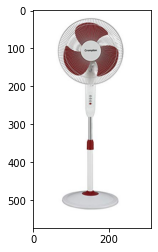

In [6]:
# displaying an image from the dataset

# reference path : /content/drive/MyDrive/datasets/mini project

img = imread('/content/drive/MyDrive/datasets/mini project/fans/Crompton High Speed Whirlwind Gale 400mm Pedestal Fan White RedA.jpg')
plt.imshow(img)

### **2. Preprocessing the data**
- Resized
- Converted from rgb to grayscale
- Flattened

In [7]:
import os 
import numpy as np
from skimage.color import rgb2grey

datadir = '/content/drive/MyDrive/datasets/mini project' #the main directory which contains all the datasets
categories = ['birds','fans'] #a list containing the names of all the categories in the datasets folder

target = []
flat_data = []

for i in categories:
  path = os.path.join(datadir,i) 
  for img in os.listdir(path):
    
    img_array = imread(os.path.join(path,img))
    
    img_resize = resize(img_array, (150,150,3)) # all the images are resized
    gray_img_resize = rgb2grey(img_resize)
    
    flat_data.append(np.ndarray.flatten(gray_img_resize)) # all the resized images are flattened
    target.append(i)

flat_data = np.array(flat_data) # this flattened data will be the x value
target = np.array(target) # target(category) will be the y value

In [8]:
# Making the data frame from the flattened values

df = pd.DataFrame(flat_data)
df['Target'] = target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22461,22462,22463,22464,22465,22466,22467,22468,22469,22470,22471,22472,22473,22474,22475,22476,22477,22478,22479,22480,22481,22482,22483,22484,22485,22486,22487,22488,22489,22490,22491,22492,22493,22494,22495,22496,22497,22498,22499,Target
0,0.569906,0.572995,0.570772,0.569073,0.569906,0.564013,0.563179,0.562346,0.562063,0.559258,0.557806,0.562063,0.561230,0.565151,0.565151,0.565151,0.565151,0.561230,0.565151,0.567951,0.571534,0.570395,0.575777,0.572689,0.576916,0.576916,0.576916,0.576916,0.576916,0.576916,0.576916,0.572995,0.569073,0.569073,0.565151,0.565151,0.561230,0.559269,0.553387,0.553387,...,0.064044,0.038420,0.025805,0.030145,0.036807,0.038400,0.032764,0.033047,0.036969,0.029125,0.025204,0.021282,0.021282,0.013722,0.021356,0.021292,0.017361,0.021213,0.021282,0.021282,0.016415,0.010204,0.017361,0.017361,0.017361,0.017361,0.017361,0.018347,0.029142,0.034067,0.034067,0.041116,0.065884,0.069882,0.086071,0.087004,0.079272,0.064765,0.095171,birds
1,0.395459,0.394831,0.397971,0.398475,0.402305,0.397056,0.399943,0.398420,0.400965,0.397806,0.398279,0.399596,0.406421,0.405067,0.397882,0.395000,0.394290,0.400042,0.403473,0.391877,0.391728,0.397367,0.405705,0.407971,0.400367,0.400743,0.399032,0.396153,0.391362,0.389375,0.391492,0.387693,0.384367,0.377197,0.381603,0.375484,0.374322,0.379207,0.371085,0.369322,...,0.835165,0.976738,0.971820,0.964140,0.961709,0.956297,0.952376,0.948454,0.940611,0.936689,0.932984,0.928788,0.921836,0.921003,0.915180,0.913160,0.909238,0.901395,0.897756,0.894385,0.890675,0.889768,0.890464,0.890464,0.882621,0.883794,0.885798,0.886542,0.883329,0.875879,0.870291,0.870291,0.866369,0.862447,0.857345,0.855953,0.854887,0.852293,0.850377,birds
2,0.306123,0.305052,0.305007,0.305007,0.307954,0.311192,0.315457,0.320841,0.324461,0.330159,0.335586,0.342619,0.348862,0.354598,0.359225,0.364214,0.368873,0.372591,0.376047,0.378558,0.379572,0.382197,0.381914,0.384391,0.388365,0.392548,0.397020,0.402217,0.410194,0.418551,0.426452,0.436443,0.446535,0.454406,0.462478,0.470547,0.477315,0.479514,0.480875,0.483655,...,0.172688,0.219780,0.221931,0.144535,0.287086,0.208087,0.347917,0.437620,0.427719,0.437452,0.452961,0.453980,0.453777,0.453265,0.450757,0.450771,0.448817,0.446561,0.443648,0.439532,0.434062,0.421493,0.431698,0.399177,0.390794,0.381261,0.370859,0.343026,0.293567,0.238675,0.201317,0.193467,0.221804,0.466459,0.423869,0.226782,0.315393,0.367637,0.371525,birds
3,0.239297,0.242725,0.243127,0.242356,0.240564,0.235988,0.230524,0.225530,0.225970,0.227294,0.228416,0.234863,0.238204,0.241394,0.241928,0.245885,0.251976,0.254066,0.257795,0.262006,0.268848,0.272946,0.273821,0.302672,0.368143,0.423559,0.454945,0.477335,0.449098,0.365962,0.280660,0.225400,0.242334,0.279875,0.284220,0.284548,0.287194,0.288380,0.291760,0.293202,...,0.295350,0.292697,0.292523,0.290331,0.288775,0.285664,0.286121,0.225055,0.112584,0.050840,0.075557,0.088893,0.144117,0.231957,0.309222,0.446246,0.313795,0.391086,0.300345,0.309304,0.209475,0.241611,0.215027,0.545372,0.759562,0.732171,0.664197,0.503560,0.497644,0.537691,0.492218,0.546257,0.505392,0.611591,0.637230,0.717160,0.499593,0.278451,0.259563,birds
4,0.344216,0.348138,0.351153,0.353741,0.356190,0.358228,0.358228,0.363278,0.370095,0.376423,0.383156,0.390999,0.401648,0.409261,0.420008,0.432060,0.444112,0.456644,0.471666,0.489046,0.508654,0.526213,0.541281,0.553704,0.561607,0.569450,0.574946,0.584035,0.588890,0.595800,0.601057,0.606999,0.611116,0.618926,0.623251,0.623251,0.627172,0.627172,0.630737,0.629955,...,0.528530,0.528963,0.531886,0.533348,0.534669,0.534440,0.534386,0.529065,0.524796,0.516850,0.513006,0.510747,0.508877,0.504673,0.500469,0.493742,0.492824,0.494009,0.497931,0.501853,0.499665,0.497365,0.497365,0.493444,0.497365,0.497365,0.500722,0.502962,0.502679,0.505202,0.508840,0.511914,0.515553,0.511631,0.511631,0.510232,0.512734,0.513871,0.515843,birds


In [9]:
# Splitting the data into training and testing sets

x = flat_data
y = target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0, stratify = y)

### **3. Classification Algorithm and Best Parameters**
- Using the SVM Algorithm for classification
- Hyperparameter tuning using GridSearchCV

In [14]:
#Hyperparameter Tuning

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
model = SVC()
param = {
    'kernel':['linear', 'rbf', 'poly'],
    'C':[0.1,1,10,100]
}

grid = GridSearchCV(model, param, cv = 5)
grid.fit(x_train, y_train)
grid.best_params_

{'C': 0.1, 'kernel': 'poly'}

In [16]:
model = SVC(C=0.1,kernel='poly')
model.fit(x_train, y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
y_pred = model.predict(x_test)

### **4. Evaluation of Model**
- Confusion Matrix
- Classification Report

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_pred,y_test)

0.9333333333333333

In [19]:
confusion_matrix(y_pred, y_test)

array([[8, 1],
       [0, 6]])

In [20]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       birds       1.00      0.89      0.94         9
        fans       0.86      1.00      0.92         6

    accuracy                           0.93        15
   macro avg       0.93      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15



### **5.Predicting for new images**

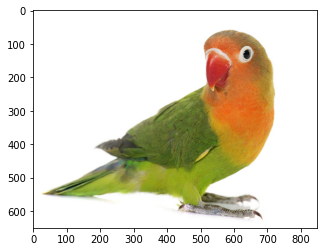

In [21]:
# Considering a new image which is not there in the dataset

img_test = imread('/content/drive/MyDrive/datasets/for testing/lovebird.jpg')
plt.imshow(img_test)

In [22]:
# Preprocessing the new image

img_test_resize = resize(img_test, (150,150,3)) # all the images are resized, values get converted to 0-1 from 0-255
gray_img_test_resize = rgb2grey(img_test_resize)
    
processed_img_test = np.ndarray.flatten(gray_img_test_resize)
processed_img_test

array([0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
       0.99607843])

In [23]:
# Predicting for the new image

model.predict([processed_img_test])

array(['birds'], dtype='<U5')